c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


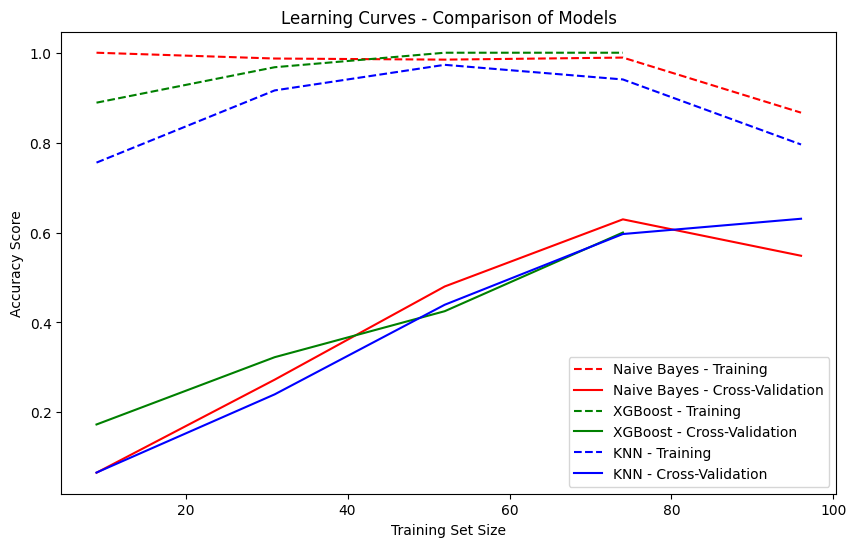

Naive Bayes Accuracy: 80.00%
Naive Bayes Precision: 72.57%

XGBoost Accuracy: 60.00%
XGBoost Precision: 60.67%

KNN Accuracy: 84.00%
KNN Precision: 73.90%


In [6]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
import numpy as np


# Read the dataset
df = pd.read_csv('your_dataset.csv')

# Split the dataset into features (X) and target labels (y)
X = df['Refractive Index'].values.reshape(-1, 1)
y = df['Disease']

# Use LabelEncoder to convert string labels to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
clf = GaussianNB()


# Train the Naive Bayes classifier
clf.fit(X_train, y_train)

# Make predictions on the test set using Naive Bayes
y_pred_nb = clf.predict(X_test)

# Evaluate Naive Bayes
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)
precision_nb = metrics.precision_score(y_test, y_pred_nb, average='weighted', zero_division=0)

# Create XGBoost model
model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(df['Disease'].unique()))

# Train the XGBoost model
model.fit(X_train, y_train)

# Make predictions using XGBoost
y_pred_xgb = model.predict(X_test)

# Evaluate XGBoost
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
precision_xgb = metrics.precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0)

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set using KNN
y_pred_knn = knn.predict(X_test)


# Evaluate KNN
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
precision_knn = metrics.precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)


classifiers = [clf, model,knn]
labels = ['Naive Bayes', 'XGBoost', 'KNN']
colors = ['r', 'g', 'b']

# Plot Learning Curves for all models
plt.figure(figsize=(10, 6))

for clf, label, color in zip(classifiers, labels, colors):
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y_encoded, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label=f'{label} - Training', linestyle='--', color=color)
    plt.plot(train_sizes, test_scores_mean, label=f'{label} - Cross-Validation', color=color)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves - Comparison of Models')
plt.legend()
plt.show()

# Print accuracy and precision
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb * 100))
print("Naive Bayes Precision: {:.2f}%".format(precision_nb * 100))
print("\nXGBoost Accuracy: {:.2f}%".format(accuracy_xgb * 100))
print("XGBoost Precision: {:.2f}%".format(precision_xgb * 100))
print("\nKNN Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("KNN Precision: {:.2f}%".format(precision_knn * 100))






